# 좋은 모형이란?

## 1. 적합이 좋은 모형
* 회귀직선이 데이터에 완전히 들어맞고, 잔차가 작음
* 설명변수를 증가시킴으로써 적합도를 높일 수 있음 --> 과하면 과적합: 데이터에 지나치게 적합되어 일반적인 예측성을 잃음

## 2. 예측이 좋은 모형
* 미지의 데이터 (모르는 데이터의 설명변수)라도 모형이 반응변수를 정확하게 예측 --> 일반화

## 좋은 모형
* 보통 적합이 좋은 모형보다 예측이 좋은 모형을 고름

## 모형의 좋고 나쁨을 측정하는 지표들
* statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
df = pd.read_csv('./ch12_scores_reg.csv')
df

,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk
5,0.9,40,7.6,bus
6,1.9,23,4.3,walk
7,3.5,37,4.2,bicycle
8,4.0,39,4.7,bicycle
9,5.4,55,7.5,walk


In [3]:
x = np.array(df["quiz"])
y = np.array(df["final_test"])

formula = "final_test ~ quiz" # final_test: 반응변수, quiz: 설명변수
result = smf.ols(formula, df).fit()
# Ordinary Least Square (OLS): 잔차제곱합을 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법...
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           8.59e-06
Time:                        17:59:29   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
y_hat = np.array(result.fittedvalues) # 예측값
y_hat

array([51.22517229, 70.88637011, 23.69949535, 43.36069316, 33.53009426,
       29.59785469, 36.1515873 , 46.63755947, 49.91442577, 59.08965142,
       51.22517229, 68.92025033, 36.80696056, 81.37234228, 25.66561513,
       67.60950381, 51.22517229, 60.40039794, 32.874721  , 36.80696056])

In [5]:
eps_hat = np.array(result.resid) # 잔차
eps_hat

array([ 15.77482771,   0.11362989,  -4.69949535,  -8.36069316,
         1.46990574,  10.40214531, -13.1515873 ,  -9.63755947,
       -10.91442577,  -4.08965142, -11.22517229,   1.07974967,
        -7.80696056,   6.62765772,  21.33438487,   9.39049619,
         0.77482771,  -5.40039794, -14.874721  ,  23.19303944])

In [6]:
np.sum(eps_hat ** 2) # 잔차제곱합

2417.227825229262

* 잔차제곱합은 동일한 모형 중에서 상대적으로 비교할 때만 사용 가능

# 결정계수 (R-squared)
* 모형의 데이터에 대한 **적합도**를 나타내는 지표
* 0 ~ 1: 1에 가까울수록 데이터에 잘 들어맞는 것
* 결정계수 = 회귀변동 / 총변동 = 1 - (잔차변동 / 총변동)

## 총변동 (Total variation)
* 관측값의 분산값

## 회귀변동 (Regression var.)
* 예측값이 관측값의 평균값에 대해 어느 정도 분산되어 있는지
* 예측값이 관측값에 가까울수록 총변동에 가까워짐

## 잔차변동 (Residual var.)
* 잔차제곱합
* 예측값이 관측값에 가까울수록 잔차변동이 0에 가까워짐

## 총변동 = 회귀변동 + 잔차변동

## 주의!
* 관련 없는 변수가 들어가도 설명변수가 증가하면 결정계수는 증가
==> 조정결정계수

In [7]:
total_var = np.sum((y - np.mean(y)) ** 2)     # 총변동
exp_var   = np.sum((y_hat - np.mean(y)) ** 2) # 회귀변동
unexp_var = np.sum(eps_hat ** 2)              # 잔차변동

total_var, exp_var + unexp_var

(7468.55, 7468.549999999996)

In [8]:
exp_var / total_var # 결정계수

0.6763457665504996

# 조정결정계수 (Adjusted R-square; Adj. R-squared)
* **자유도조정 결정계수**라고도 함: 자유도를 고려한 결정계수
* page 366 식 참고

In [9]:
n = len(df)
p = 1 # 설명변수의 개수

1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.6583649758033057

# F 검정 (F test; F-statistic)
* 절편 이외의 회귀계수에 관해서 수행되는 검정
* 귀무가설: 회귀계수 = 0, 대립가설: 적어도 하나의 회귀계수는 0이 아님
* page 367 식 참고: 모형의 적합도가 좋을수록 잔차변동보다 회귀변동이 커짐
* F 검정통계량이 일정 값보다 커지면, 모형이 데이터에 적합되어 있다!
* 분산 분석 (ANalysis Of VAriance; ANOVA): 통계학 강의!

In [10]:
f = (exp_var / p) / (unexp_var / (n - p - 1))
f

37.61490671126522

In [11]:
rv = stats.f(p, n - p - 1) # F 분포
1 - rv.cdf(f) # p 값: 귀무가설이 기각되므로 설명변수 증 적어도 하나는 반응변수에 영향을 준다고 해석

8.590875866687497e-06

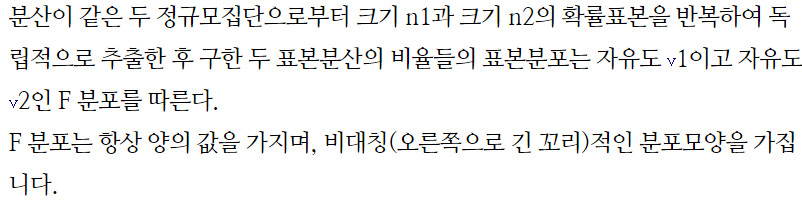
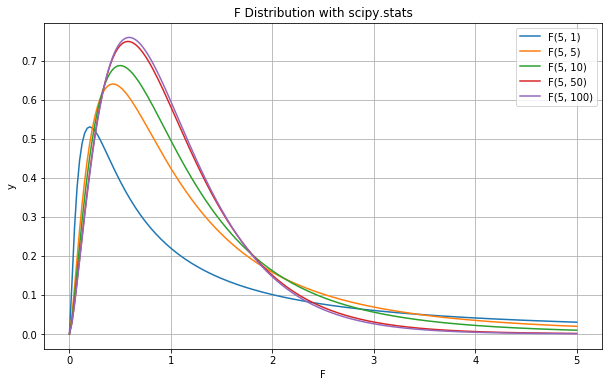

# 최대로그우도, AIC
* 앞서 결정계수, 조정결정계수, F검정은 모형의 데이터에 대한 **적합도**를 나타내는 지표
* 아카이케 정보량 기준 (AIC; Akaike's Information Criterion)은 모형의 **예측** 성능에 관한 지표

## 우도 (Likelihood)
* 어떤 관측값을 얻을 확률
* 예: 동전(앞면의 확률이 0.3)의 앞면을 1, 뒷면을 0이라 할 때, 동전을 5 번 던져 [0, 1, 0, 0, 1]로 나올 확률

$$L = \prod_{i=1} f(x_i)$$

In [12]:
p = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(p)
ps = rv.pmf(coin_result)

ps

array([0.7, 0.3, 0.7, 0.7, 0.3])

In [13]:
L = np.prod(ps) # np.prod: Array 내부 곱

L # 즉, L(우도 함수)는 p에 대한 함수

0.030870000000000005

* 예: p를 알지 못하는 상황에서, p를 0에서 1로 변화시킬 때의 우도함수 L은

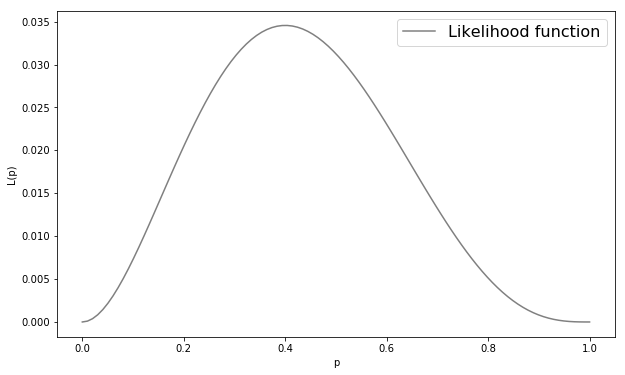

In [14]:
ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(p).pmf(coin_result)) for p in ps]

fig, sub = plt.subplots(figsize = (10, 6))
sub.plot(ps, Ls, label = "Likelihood function", c = "gray")
sub.legend(fontsize = 16)
sub.set_xlabel("p")
sub.set_ylabel("L(p)")

plt.show()

* p가 0.4에서 우도함수가 최대
* 관측값에 의해 p = 0.4로 추정 => **최우추정법**, **최우추정값**

## 로그우도 (Log-likelihood)
* 우도는 확률의 곱이므로, 곱할수록 0에 가까워짐
* 계산 오차를 줄이기 위해 우도에 로그를 취해 사용.

$$\log L = \sum_{i=1} \log f(x_i)$$

## 최대로그우도 (Maximum log-likelihood)
* 우도함수가 최대 -> 로그우도함수도 최대 => 최대로그우도
* 최대로그우도 값이 **클수록** 모형의 적합도가 높다
* 로그우도도 모형의 **적합도**를 나타내는 지표

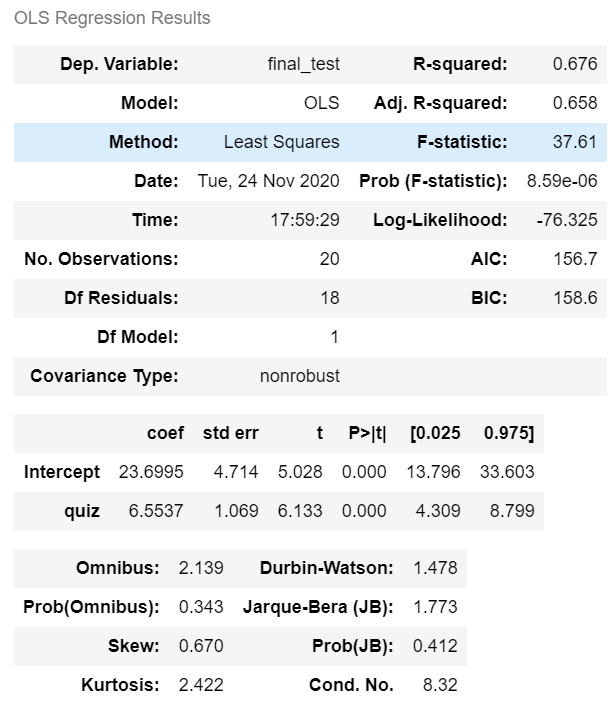

## AIC (Akaike's Information Criterion)
* 예측성에 대한 지표
* 실제로 모형을 선택할 때 AIC을 고려하는 경우가 많음

$$AIC = -2 \times 최대로그우도 + 2 \times 회귀계수의 수$$

* 회귀계수의 수를 페널티로 부과하여 설명변수를 늘린 모형이 좋은 모형으로 선택되지 않게 함
* AIC 값이 **작을수록** 모형의 예측 정확도가 좋음

# 베이지안 정보 기준 (BIC; Bayesian Information Criterion)
* 회귀계수의 수에 더해 표본 크기($n$)에 대해서도 페널티를 부과

$$BIC = -2 \times 최대로그우도 + \log n \times 회귀계수의 수$$

* BIC가 **작을수록** 모형의 예측 정확도가 좋음